An essential dimension of motion is speed. However, this notion is prone to confusions as the speed that has to be measured can be relative to different object. Is it the speed of pixels? The speed of visual objects? We try to distinguish the latter two in this post.

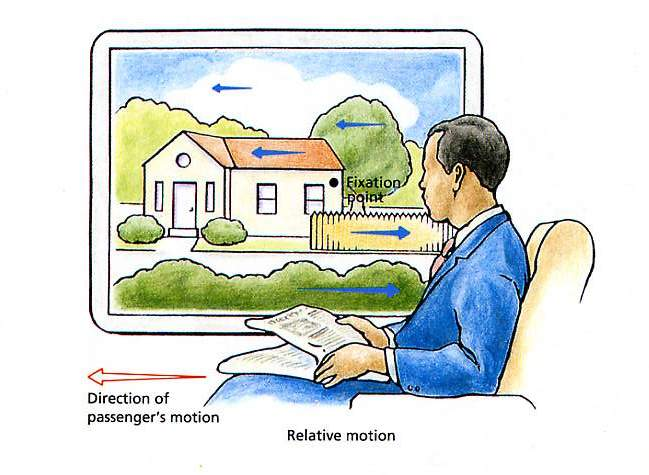

In [4]:
from IPython.display import Image
Image('http://www.rhsmpsychology.com/images/monocular_IV.jpg')

<!-- TEASER_END -->

In [1]:
%matplotlib inline
import numpy as np
np.set_printoptions(precision=3, suppress=True)
import pylab
import matplotlib.pyplot as plt

In [2]:
import os
name = '2017-04-10_physical_speed'
DOWNSCALE = 1

import MotionClouds as mc
N_X, N_Y, N_frame = mc.N_X/DOWNSCALE, mc.N_Y/DOWNSCALE, mc.N_frame/DOWNSCALE

fx, fy, ft = mc.get_grids(N_X, N_Y, N_frame)
mc.figpath = '../files/2017-04-10_physical_speed/'
if not(os.path.isdir(mc.figpath)): os.mkdir(mc.figpath)

In standard [Motion Clouds](https://neuralensemble.github.io/MotionClouds), speed is that of the pixels of the textons that produce the texture. It is thus defined as a (normal) distribution of probability around the speed plane that defines the mean speed: 

In [3]:
z = mc.envelope_gabor(fx, fy, ft)
name_ = name + '_vanilla' 
mc.figures(z, name_, figpath=mc.figpath)
mc.in_show_video(name_, figpath=mc.figpath)

/usr/local/lib/python3.7/site-packages/vispy/visuals/isocurve.py:22: UserWarning: VisPy is not yet compatible with matplotlib 2.2+
  warnings.warn("VisPy is not yet compatible with matplotlib 2.2+")


## textures with motion parallax

Another way to consider speed is that of visual objects. Consider looking through the window of a train a field of similarly sized (Gabor-shaped) bushes on an infinite plane. The objects which are closer appear bigger on the retina and their speed is perceived as higher than the smaller bushes near the horizon. This relation between size and speed is linear and is called motion parallax (credit: http://www.rhsmpsychology.com/Handouts/monocular_cues_IV.htm).

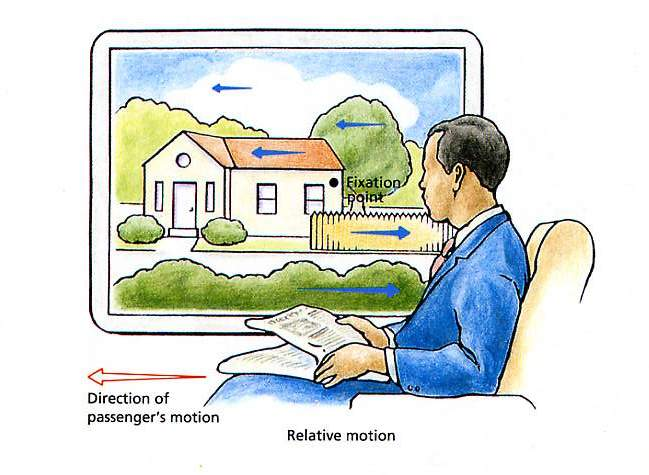

In [4]:
from IPython.display import Image
Image('http://www.rhsmpsychology.com/images/monocular_IV.jpg')

Such a pattern of motion distribution is highly prototypical in natural settings and it is easy to generate a texture having such a profile but with textons that are uniformly spaced in space, similar to the "Golconde" painting from Magritte (By The Shimon Yanowitz Website, Fair use, https://en.wikipedia.org/w/index.php?curid=3773027):

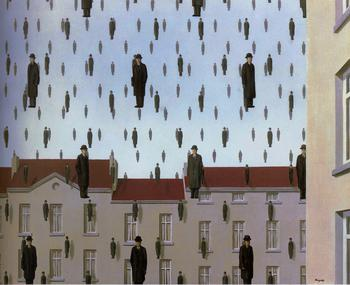

In [5]:
Image('https://upload.wikimedia.org/wikipedia/en/7/71/Golconde.jpg')

More specifically, one finds that if we place MotionClouds on different planes perpendicular to the axis of vision, their frequency will increase as they get further , but their temporal frequency keeps constant:
$$
f_0 \propto \arctan(\frac{F_0}{D})
$$
and
$$
f_t \propto F_T
$$

where $F_0$ is the central scale (spatial frequency) of the visual object,  $f_0$ its frequency in retinal space and $D$ the distance. Compared to the classical definition of MotionClouds, this affects only the way we define the enveloppe around the speed plane. For a parallax-compatible motion, this enveloppe is on a plane around a fixed temporal frequency:

In [6]:
mc.B_sf

0.1

In [7]:
def envelope_parallax_speed(fx, fy, ft, K=1., V_X=mc.V_X, V_Y=mc.V_Y,
                        B_V=mc.B_V, sf_0=mc.sf_0, B_sf=mc.B_sf, loggabor=mc.loggabor,
                        theta=mc.theta, B_theta=mc.B_theta, alpha=mc.alpha):
    """
     parallax speed envelope:
     selects a gaussian perpendicualr to the plane corresponding to the speed (V_X, V_Y) with some thickness B_V

    """


    envelope = mc.envelope_color(fx, fy, ft, alpha=alpha)
    envelope *= mc.envelope_orientation(fx, fy, ft, theta=theta, B_theta=B_theta)    
    envelope *= mc.envelope_radial(fx, fy, ft, sf_0=sf_0, B_sf=B_sf, loggabor=loggabor)
    
    f_radius = mc.frequency_radius(fx, fy, ft, ft_0=mc.ft_0, clean_division=True)
    V = np.sqrt(V_X**2 + V_Y**2)
    envelope *= np.exp(-.5*((np.sign(fx) * ft + sf_0 * V)**2/(B_V*sf_0)**2))
    # Hack to remove the other part of the envelope - use angle instead to allow for higher B_theta values
    return envelope

name_ = name + '_parallax'
opts= dict(V_X=.5, sf_0=.2, B_V=.1, B_sf=.25)
z = envelope_parallax_speed(fx, fy, ft, **opts)
mc.figures(z, name_, figpath=mc.figpath)
mc.in_show_video(name_, figpath=mc.figpath)

Let's explore what happens for different values of B_V:

In [8]:
opts_= dict(V_X=.5, sf_0=.2)
for B_V_ in np.logspace(-1, 1, 5, base=2)*opts['B_V']:
    name_ = name + '_parallax_B_V_' + str(B_V_).replace('.', '_') #os.path.join(mc.figpath, )
    z = envelope_parallax_speed(fx, fy, ft, B_V=B_V_, **opts_)
    mc.figures(z, name_, figpath=mc.figpath)
    mc.in_show_video(name_, figpath=mc.figpath)

## group speed vs phase speed

More generally, this manipulation ---by changing the shape of the enveloppe--- changes the group vs phase speeds, as we did before with simulation of (earthly) [gravitational waves](https://laurentperrinet.github.io/sciblog/posts/2014-10-24_a-bit-of-fun-with-gravity-waves.html). This can be done explictly by changing the shape of the enveloppe:

In [9]:
def envelope_physical_speed(fx, fy, ft, K=1., V_X=mc.V_X, V_Y=mc.V_Y,
                        B_V=mc.B_V, sf_0=mc.sf_0, B_sf=mc.B_sf, loggabor=mc.loggabor,
                        theta=mc.theta, B_theta=mc.B_theta, alpha=mc.alpha):
    """
     physical speed envelope:
     selects a gaussian perpendicualr to the plane corresponding to the speed (V_X, V_Y) with some thickness B_V

    """


    envelope = mc.envelope_color(fx, fy, ft, alpha=alpha)
    envelope *= mc.envelope_orientation(fx, fy, ft, theta=theta, B_theta=B_theta)    
    envelope *= mc.envelope_radial(fx, fy, ft, sf_0=sf_0, B_sf=B_sf, loggabor=loggabor)
    
    f_radius = mc.frequency_radius(fx, fy, ft, ft_0=mc.ft_0, clean_division=True)
    envelope *= np.exp(-.5*((ft + sf_0 * V_X - (f_radius - sf_0) / K )**2/(B_V*sf_0)**2))
    # Hack to remove the other part of the envelope - use angle instead to allow for higher B_theta values
    envelope *= fx*ft > 0

    
    return envelope

name_ = name + '_group_speed'
K = 1.
opts= dict(V_X=.5, sf_0=.2, B_V=.2)
z = envelope_physical_speed(fx, fy, ft, K=K, **opts)
mc.figures(z, name_)
mc.in_show_video(name_)

Let's explore what happens for different values of K:

In [10]:
for K_ in 1./np.linspace(0.6, 1.4, 7)*K:
    name_ = name + '_group_speed_K_' + str(K_).replace('.', '_')
    z = envelope_physical_speed(fx, fy, ft, K=K_, **opts)
    mc.figures(z, name_)
    mc.in_show_video(name_)